<a href="https://colab.research.google.com/github/SShresth7272/Python-Code/blob/main/Machine_Learning_Linear_Regression_Non_numeric_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Doing Linear Regression with Non-Numeric type dataframe.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,
    classification_report, confusion_matrix,
    precision_recall_curve, average_precision_score,mean_squared_error, r2_score
)
from sklearn.preprocessing import LabelBinarizer, label_binarize
from sklearn.multiclass import OneVsRestClassifier




from sklearn.svm import SVC




import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Healthcare_Analytics (2).csv to Healthcare_Analytics (2).csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Healthcare_Analytics (2).csv'])).dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df['Gender'].fillna('Missing', inplace=True)
df['ScheduledDay'].fillna('Missing', inplace=True)
df['AppointmentDay'].fillna('Missing', inplace=True)
df['No-show'].fillna(df['Age'].median(), inplace=True)
df['Neighbourhood'].fillna(df['Age'].median(), inplace=True)




In [ ]:
df['PatientId'].fillna(df['PatientId'].median(), inplace=True)
df['AppointmentID'].fillna(df['AppointmentID'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Scholarship'].fillna(df['Scholarship'].median(), inplace=True)
df['Hipertension'].fillna(df['Hipertension'].median(), inplace=True)
df['Diabetes'].fillna(df['Diabetes'].median(), inplace=True)
df['Alcoholism'].fillna(df['Alcoholism'].median(), inplace=True)
df['Handcap'].fillna(df['Handcap'].median(), inplace=True)
df['SMS_received'].fillna(df['SMS_received'].median(), inplace=True)


In [ ]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,0,23264,0,62,33,0,1,0,0,0,0,0
1,5.590000e+14,5642503,1,23000,0,56,33,0,0,0,0,0,0,0
2,4.260000e+12,5642549,0,23038,0,62,40,0,0,0,0,0,0,0
3,8.680000e+11,5642828,0,23227,0,8,50,0,0,0,0,0,0,0
4,8.840000e+12,5642494,0,22992,0,56,33,0,1,1,0,0,0,0
5,9.600000e+13,5626772,0,14745,0,76,54,0,1,0,0,0,0,0
6,7.340000e+14,5630279,0,16202,0,23,18,0,0,0,0,0,0,1
7,3.450000e+12,5630575,0,16324,0,39,18,0,0,0,0,0,0,1
8,5.640000e+13,5638447,0,20156,0,21,1,0,0,0,0,0,0,0
9,7.810000e+13,5629123,0,15656,0,19,4,0,0,0,0,0,0,0


In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index([], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [ ]:
print(df.dtypes)


PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay        int64
AppointmentDay      int64
Age                 int64
Neighbourhood       int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show             int64
dtype: object


In [ ]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,0,23264,0,62,33,0,1,0,0,0,0,0
1,5.590000e+14,5642503,1,23000,0,56,33,0,0,0,0,0,0,0
2,4.260000e+12,5642549,0,23038,0,62,40,0,0,0,0,0,0,0
3,8.680000e+11,5642828,0,23227,0,8,50,0,0,0,0,0,0,0
4,8.840000e+12,5642494,0,22992,0,56,33,0,1,1,0,0,0,0
5,9.600000e+13,5626772,0,14745,0,76,54,0,1,0,0,0,0,0
6,7.340000e+14,5630279,0,16202,0,23,18,0,0,0,0,0,0,1
7,3.450000e+12,5630575,0,16324,0,39,18,0,0,0,0,0,0,1
8,5.640000e+13,5638447,0,20156,0,21,1,0,0,0,0,0,0,0
9,7.810000e+13,5629123,0,15656,0,19,4,0,0,0,0,0,0,0


In [ ]:
# Assuming df_sel is your DataFrame with selected features
X = df.drop("Age", axis=1).values  # Convert to NumPy array
y = df["Age"].values.reshape(-1, 1)  # Convert to column vector


In [ ]:
# Split the data: 70% Training, 15% Validation, 15% Test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
def model(X, Y, learning_rate, iteration):
  m=Y.size
  X = np.c_[np.ones(m), X] # add bias term
  theta = np.zeros((X.shape[1],1)) # Initialize theta
  cost_list = []

  for i in range(iteration):
    y_pred = np.dot(X,theta)
    cost = (1 / (2 * m)) * np.sum(np.square(y_pred - Y)) # MSE Cost
    d_theta  = (1/ m) * np.dot(X.T, y_pred - Y) # Gradient equation
    theta = theta - learning_rate * d_theta
    cost_list.append(cost)

    # Add print statements to check for NaN values
    if np.isnan(theta).any():
        print(f"NaN in theta at iteration {i}")
        break
    if np.isnan(cost).any():
        print(f"NaN in cost at iteration {i}")
        break

  return theta, cost_list

In [ ]:

# Convert data into NumPy arrays for matrix operations
X_train, y_train = X_train, y_train.reshape(-1, 1)
X_val, y_val = X_val, y_val.reshape(-1, 1)
X_test, y_test = X_test, y_test.reshape(-1, 1)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(77368, 13)
(77368, 1)
(16580, 13)
(16580, 1)


In [ ]:
# Training the model
learning_rate = 0.00000001  # Adjusted for stability
iterations = 5000
theta, cost_list = model(X_train, y_train, learning_rate, iterations)

In [ ]:
# Making predictions
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias term
X_val_bias = np.c_[np.ones(X_val.shape[0]), X_val]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

y_train_pred = np.dot(X_train_bias, theta)
y_val_pred = np.dot(X_val_bias, theta)
y_test_pred = np.dot(X_test_bias, theta)

In [ ]:
print(X_train_bias.shape)

(77368, 14)


In [ ]:
# Compute MSE
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)

ValueError: Input contains NaN.

In [ ]:
# Assuming df_sel is your DataFrame with selected features
X = df.drop("Age", axis=1).values  # Convert to NumPy array
y = df["Age"].values.reshape(-1, 1)  # Convert to column vector

In [ ]:
# Split the data: 70% Training, 15% Validation, 15% Test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Convert data into NumPy arrays for matrix operations
X_train, y_train = X_train, y_train.reshape(-1, 1)
X_val, y_val = X_val, y_val.reshape(-1, 1)
X_test, y_test = X_test, y_test.reshape(-1, 1)

In [ ]:
# Training the model
learning_rate = 0.00000001  # Adjusted for stability
iterations = 5000
theta, cost_list = model(X_train, y_train, learning_rate, iterations)

In [ ]:
# Making predictions
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias term
X_val_bias = np.c_[np.ones(X_val.shape[0]), X_val]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

y_train_pred = np.dot(X_train_bias, theta)
y_val_pred = np.dot(X_val_bias, theta)
y_test_pred = np.dot(X_test_bias, theta)

In [ ]:
# Compute MSE
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)

ValueError: Input contains NaN.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Training the model with scaled data
learning_rate = 0.5  # Start with a slightly higher learning rate after scaling
iterations = 1000
theta, cost_list = model(X_train_scaled, y_train, learning_rate, iterations)

In [ ]:
# Making predictions with scaled data
X_train_scaled_bias = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Add bias term
X_val_scaled_bias = np.c_[np.ones(X_val_scaled.shape[0]), X_val_scaled]
X_test_scaled_bias = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

y_train_pred = np.dot(X_train_scaled_bias, theta)
y_val_pred = np.dot(X_val_scaled_bias, theta)
y_test_pred = np.dot(X_test_scaled_bias, theta)

In [ ]:
# Compute MSE
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)

Training MSE: 380.6682887270304
Validation MSE: 381.25671426322594
Test MSE: 380.5472909715189


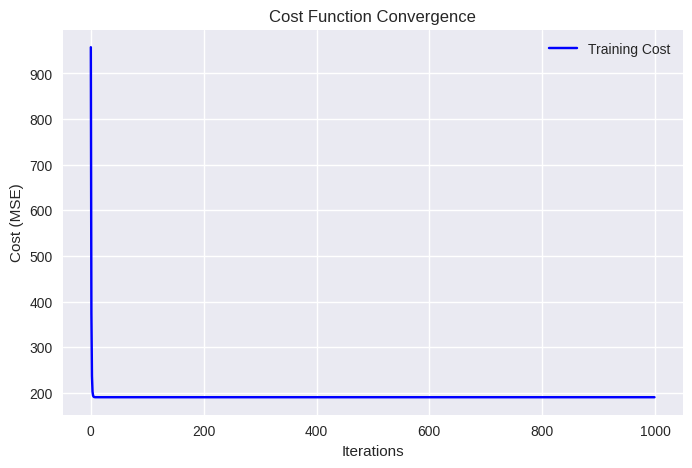

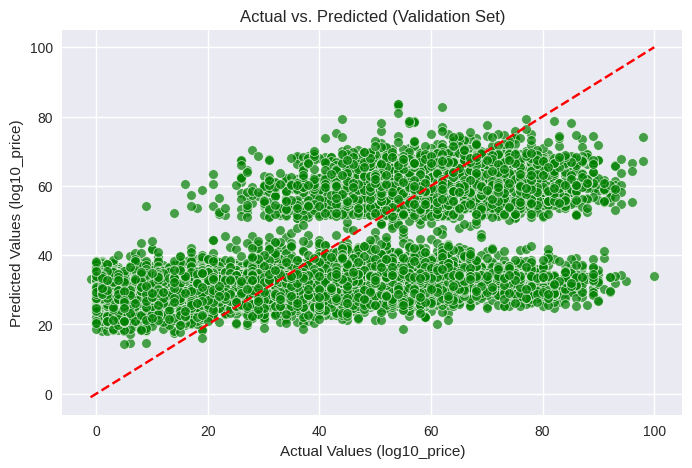

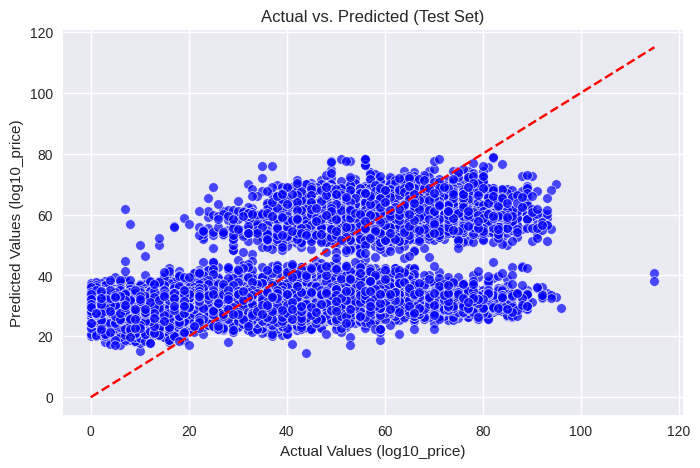

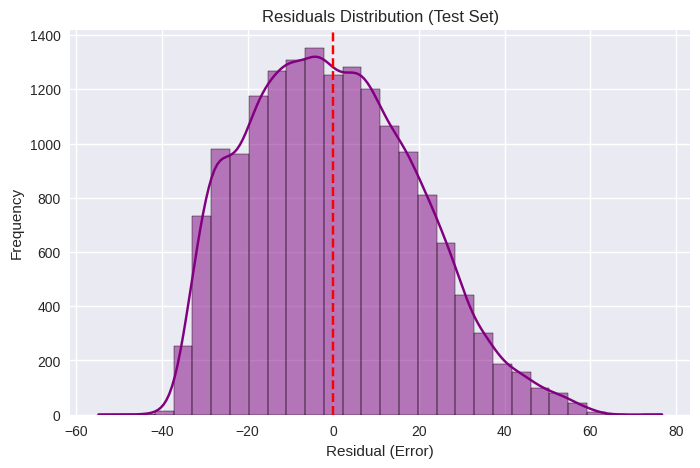

Final Model Parameters (Theta): [ 3.71476967e+01 -1.92212291e-02 -1.26187019e+00 -2.20747003e+00
  1.11019640e+00  1.08676626e-01 -8.79294798e-01 -2.04267705e+00
  1.04402023e+01  2.06522721e+00  1.61926799e+00  9.19612473e-01
  2.27741930e-01 -1.02967555e+00]
Training MSE: 380.6683
Validation MSE: 381.2567
Test MSE: 380.5473


In [ ]:




# --- VISUALIZATIONS ---

# 1. Plot Cost Function Convergence
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_list, label="Training Cost", color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function Convergence")
plt.legend()
plt.show()

# 2. Scatter Plot: Actual vs. Predicted (Validation Set)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_val.ravel(), y=y_val_pred.ravel(), color='green', alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], '--', color='red')  # Perfect Fit Line
plt.xlabel("Actual Values (log10_price)")
plt.ylabel("Predicted Values (log10_price)")
plt.title("Actual vs. Predicted (Validation Set)")
plt.show()

# 3. Scatter Plot: Actual vs. Predicted (Test Set)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test.ravel(), y=y_test_pred.ravel(), color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Perfect Fit Line
plt.xlabel("Actual Values (log10_price)")
plt.ylabel("Predicted Values (log10_price)")
plt.title("Actual vs. Predicted (Test Set)")
plt.show()

# 4. Residuals Histogram (Error Analysis)
residuals = y_test.ravel() - y_test_pred.ravel()
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Test Set)")
plt.show()

# --- PRINT RESULTS ---
print(f"Final Model Parameters (Theta): {theta.ravel()}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Validation MSE: {val_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")


